In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as knn
from sklearn import metrics

plt.rcParams['figure.figsize'] = (12, 8)
plt.style.use("fivethirtyeight")

In [2]:
data = pd.read_csv("powerproduction.csv")

In [3]:
# View all data
pd.set_option("max_rows", None)
data

,speed,power
0,0.000,0.000
1,0.125,0.000
2,0.150,0.000
3,0.225,0.000
4,0.275,0.000
5,0.325,4.331
6,0.400,5.186
7,0.450,3.826
8,0.501,1.048
9,0.526,5.553


Speed goes from lowest to highest, from 0-25, I'll assume KPH. Power generally appears to increase as speed increases.  
Power seems to be level up to about 9kph, then increases consistently between about 10-16kph and levels out again - or does it max out?
Are there fewer data points 
There are a few outliers where high wind speeds yield 0 power - perhaps an issue with the turbine or whatever device records the power output. There's a bunch of zeros at the low end (not enough speed to generate power) and at the high end (too fast to run the turbines? Dangerous maybe?)

Speed is an independent variable - a measurement of wind speed.
Power is a dependent variable - it is the amount of power generated by the wind speed as it turns the turbines. 

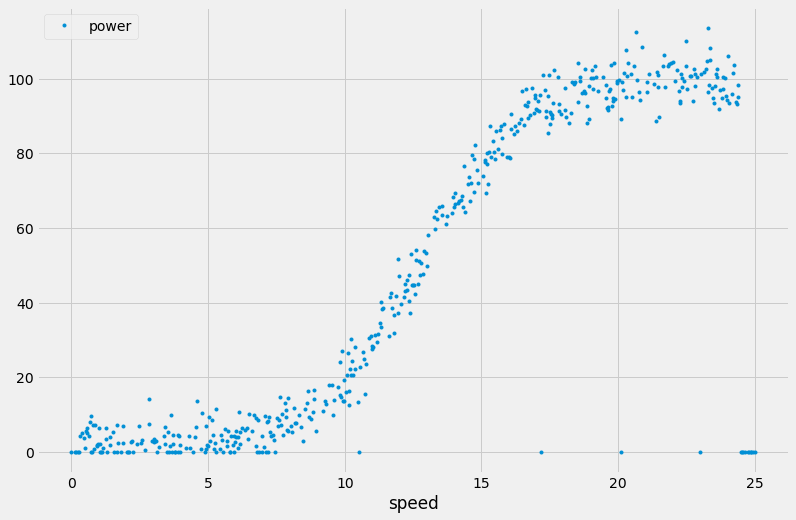

In [4]:
data.plot(x="speed", y="power", style=".")
plt.show()

Plotting the data above gives it an s-shaped curve
?Sigmoid function https://en.wikipedia.org/wiki/Sigmoid_function
Not a probability distribution but "a cumulative distribution function of logistic distribution" https://math.stackexchange.com/a/354546
Logistic distribution is a continuous probability distribution https://en.wikipedia.org/wiki/Logistic_distribution, but is "power" actually  continuous since it has minimum and maximum values? Mentions logistic regression. sklearn has a logistic regression function - could this be used to train my model? 
However, logistic regression is mainly used for modeling categorical dependent variables https://en.wikipedia.org/wiki/Logistic_distribution
Maybe it should be linear regression instead - simple linear regression - the variable to be predicted depends on just one other variable - power depends on speed.
Line of best fit graph below - doesn't look great.

<AxesSubplot:xlabel='speed', ylabel='power'>

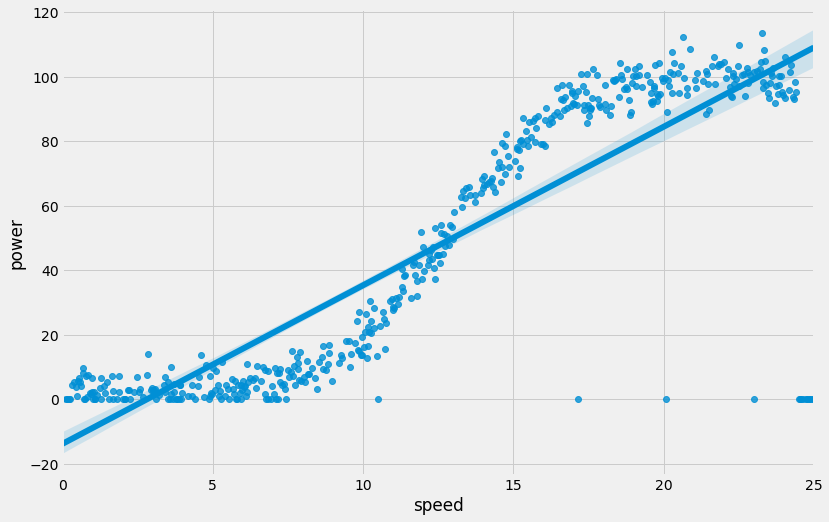

In [5]:
# Calculating line of best fit
sns.regplot(x="speed", y="power", data=data)

In [6]:
data.describe()

,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


In [7]:
# Is there a correlation?
data[['speed', 'power']].corr()

,speed,power
speed,1.000000,0.853778
power,0.853778,1.000000


Pearson correlation coefficient above shows quite a strong positive relationship - as speed increases, power tends to increase also. 

https://developer.ibm.com/technologies/data-science/tutorials/learn-regression-algorithms-using-python-and-scikit-learn/
Using mean squared error and R<sup>2</sup> to compare logistic and regression algorithms
Used this before when performing linear regression analysis on tips dataset https://github.com/jennifer-ryan/fundamentals-project/blob/master/tips_dataset_analysis.ipynb - redone below for this data

In [8]:
# Linear regression analysis 
x = data['speed'].values.reshape(-1,1)
y = data['power'].values.reshape(-1,1)

# Splitting data into training and testing variables.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 10)

# The sizes of each training and testing variable.
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)


# Training the model.
reg = LinearRegression()
model = reg.fit(x_train, y_train)

# Slope of the line created by the model.
print('Slope:',  reg.coef_)


# Predicting power based on speed values.
y_pred = reg.predict(x_test)

# Comparing predictions against acutal values.
test_model = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
test_model.head(10)

(450, 1) (50, 1) (450, 1) (50, 1)
Slope: [[4.94223374]]


,Actual,Predicted
0,6.853,23.866517
1,98.682,91.886480
2,7.245,24.484296
3,14.845,35.243539
4,9.079,19.784232
5,79.720,64.308816
6,65.605,52.926852
7,0.000,108.956956
8,13.142,25.102076
9,64.221,57.626916


In [9]:
# Evaluating the performance of the algorithm
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  # very sensitive to outlliers 
print('R-squared:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 16.072512023392868
Mean Squared Error: 664.7626143286304
R-squared: 0.6156643655787789


The r-squared value appears to indicate a good relationship but the very high mean squared error figure shows that there are a large amount of errors. The r-squared value can't be entirely trusted https://blog.minitab.com/blog/adventures-in-statistics-2/regression-analysis-how-do-i-interpret-r-squared-and-assess-the-goodness-of-fit 

Decision tree regression might work better as it breaks the data into pieces
This tutorial below: https://dev.to/nexttech/classification-and-regression-analysis-with-decision-trees-jgp

In [10]:
# Decision tree regression

# Sort X and y by ascending values of X
sort_idx = x.flatten().argsort()                 
x = x[sort_idx]
y = y[sort_idx]


# Initialize and fit regressor
tree = DecisionTreeRegressor(criterion='mse', max_depth=4)         
tree.fit(x, y)

DecisionTreeRegressor(max_depth=4)

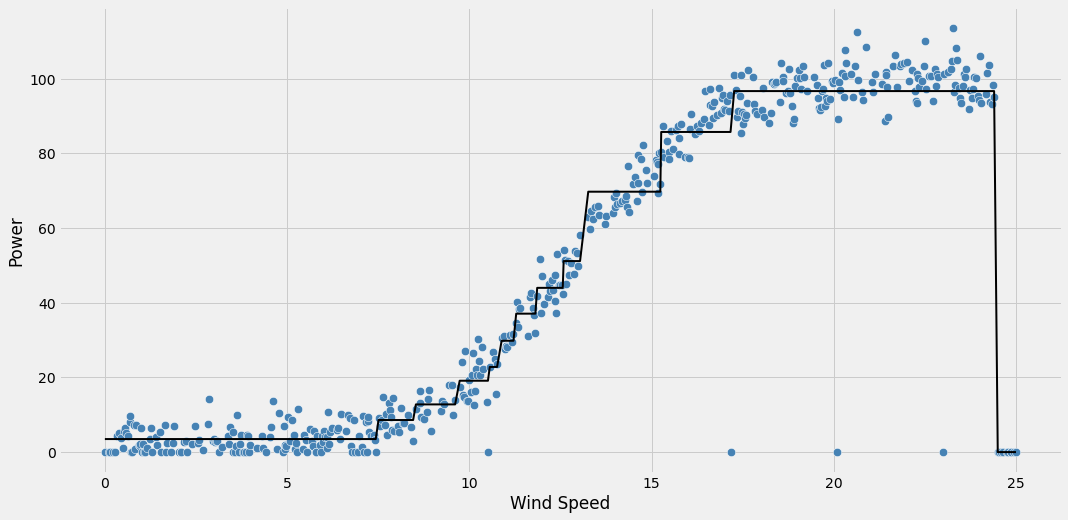

In [11]:
plt.figure(figsize=(16, 8))
plt.scatter(x, y, c='steelblue', edgecolor='white', s=70)                 # Plot actual target against features
plt.plot(x, tree.predict(x), color='black', lw=2)                         # Plot predicted target against features
plt.xlabel('Wind Speed')
plt.ylabel('Power')
plt.show()

This one splits the data into training and testing: https://towardsdatascience.com/machine-learning-basics-decision-tree-regression-1d73ea003fda

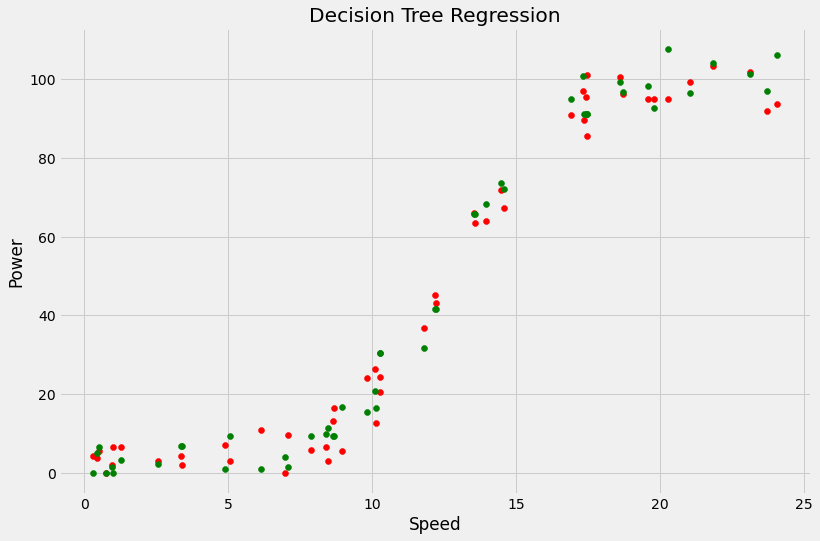

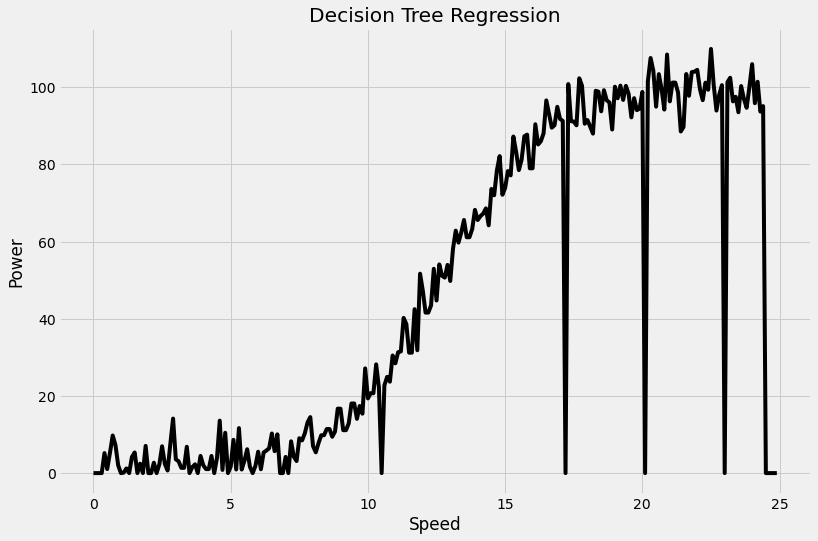

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1)

# Fitting Decision Tree Regression to the dataset
regressor = DecisionTreeRegressor()
regressor.fit(x_train, y_train)

y_pred = regressor.predict(x_test)
y_pred

# Visualising the Decision Tree Regression Results 
x_grid = np.arange(min(x), max(x), 0.1)
x_grid = x_grid.reshape((len(x_grid), 1))
plt.scatter(x_test, y_test, color = 'red')
plt.scatter(x_test, y_pred, color = 'green')
plt.title('Decision Tree Regression')
plt.xlabel('Speed')
plt.ylabel('Power')
plt.show()

plt.plot(x_grid, regressor.predict(x_grid), color = 'black')
plt.title('Decision Tree Regression')
plt.xlabel('Speed')
plt.ylabel('Power')
plt.show()

In [13]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  # very sensitive to outlliers 
print('R-squared:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 4.491320000000001
Mean Squared Error: 30.69318908000001
R-squared: 0.9806539266731636


The metrics for decision tree regression definitely look better than linear regression. The mean absolute and squared errors are much lower and the r-squared value is very high. 

Figure out the differences between the last 2 tutorials and come up with best for this data.



K nearest neighbours might also work since the data looks to bunch together at each point. I've used this before in my iris dataset project for classification https://github.com/jennifer-ryan/iris-data-set-project but will try to use it for regression here. It's not usually used for this but can be effective https://www.analyticsvidhya.com/blog/2018/08/k-nearest-neighbor-introduction-regression-python/

In [14]:
reg = knn(n_neighbors = 10)

reg.fit(x_train, y_train)

y_pred = reg.predict(x_test)

reg.score(x_test, y_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  # very sensitive to outlliers 
print('R-squared:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 4.028899999999998
Mean Squared Error: 29.189661786399984
R-squared: 0.981601607580321


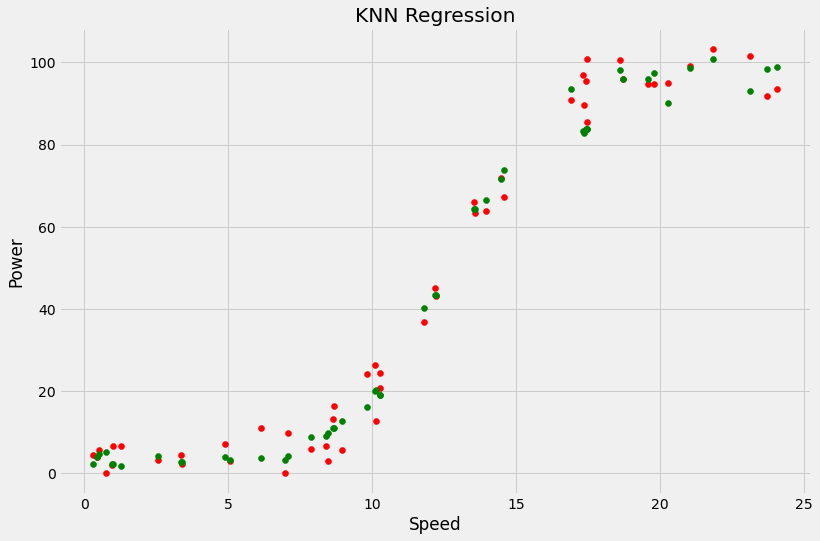

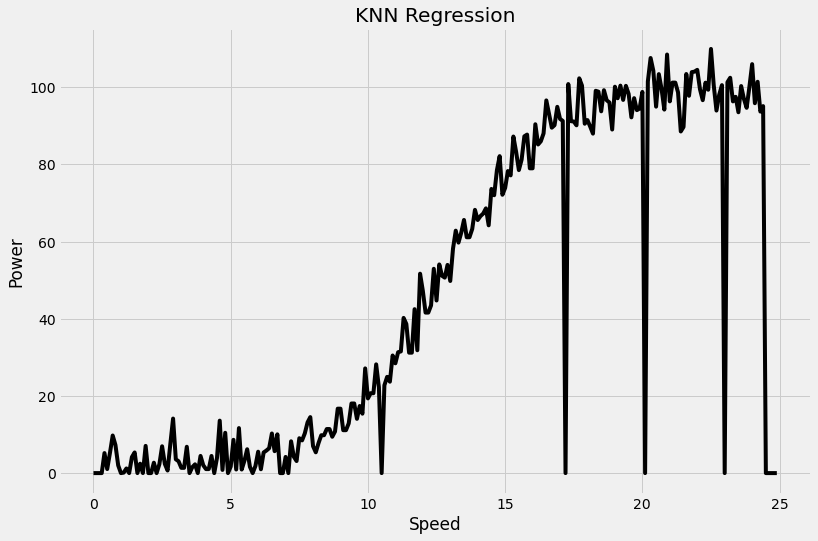

In [15]:
x_grid = np.arange(min(x), max(x), 0.1)
x_grid = x_grid.reshape((len(x_grid), 1))
plt.scatter(x_test, y_test, color = 'red')
plt.scatter(x_test, y_pred, color = 'green')
plt.title('KNN Regression')
plt.xlabel('Speed')
plt.ylabel('Power')
plt.show()

plt.plot(x_grid, regressor.predict(x_grid), color = 'black')
plt.title('KNN Regression')
plt.xlabel('Speed')
plt.ylabel('Power')
plt.show()

Attempting to fit the data using neural network and sigma function

How many hidden layers to use? How many neurons in the layer? 
Really difficult to do! https://machinelearningmastery.com/how-to-configure-the-number-of-layers-and-nodes-in-a-neural-network/



In [16]:
import tensorflow.keras as kr

In [135]:
x = data['speed'].values.reshape(-1,1)
y = data['power'].values.reshape(-1,1)

# Splitting data into training and testing variables.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 10)
x_train.shape 
#x_test.shape

(405, 1)

In [136]:
# Normalisation  https://towardsdatascience.com/keras-101-a-simple-and-interpretable-neural-network-model-for-house-pricing-regression-31b1a77f05ae
# = x_train.mean(axis=0)
#std = x_train.std(axis=0)
#x_train = (x_train - mean) / std
#x_test = (x_test - mean) / std
#x_train.shape

In [137]:
model = kr.models.Sequential()
model.add(kr.layers.Dense(20, activation = 'sigmoid', input_shape=[1]))
#model.add(kr.layers.Dense(25, activation = ''))
#model.add(kr.layers.Dense(units = 64, activation = 'relu'))
model.add(kr.layers.Dense(1, activation = 'linear'))
#model.add(kr.layers.Dropout(0.2))
model.compile(loss='mse', optimizer="adam")

# Display the model
model.summary()

Model: "sequential_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_73 (Dense)             (None, 20)                40        
_________________________________________________________________
dense_74 (Dense)             (None, 1)                 21        
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________


In [138]:
model.fit(x_train, y_train, epochs=500, batch_size=10)

Epoch 1/500
41/41 [==============================] - 1s 1ms/step - loss: 4612.9316
Epoch 2/500
41/41 [==============================] - 0s 1ms/step - loss: 4515.9281
Epoch 3/500
41/41 [==============================] - 0s 2ms/step - loss: 4419.0563
Epoch 4/500
41/41 [==============================] - 0s 1ms/step - loss: 3978.7911
Epoch 5/500
41/41 [==============================] - 0s 998us/step - loss: 4362.8832
Epoch 6/500
41/41 [==============================] - 0s 2ms/step - loss: 3991.8666
Epoch 7/500
41/41 [==============================] - 0s 2ms/step - loss: 3742.6833
Epoch 8/500
41/41 [==============================] - 0s 2ms/step - loss: 3994.1280
Epoch 9/500
41/41 [==============================] - 0s 2ms/step - loss: 4047.3652
Epoch 10/500
41/41 [==============================] - 0s 2ms/step - loss: 3529.8731
Epoch 11/500
41/41 [==============================] - 0s 2ms/step - loss: 3670.0495
Epoch 12/500
41/41 [==============================] - 0s 2ms/step - loss: 3692.5893

41/41 [==============================] - 0s 2ms/step - loss: 945.8381
Epoch 99/500
41/41 [==============================] - 0s 2ms/step - loss: 925.1527
Epoch 100/500
41/41 [==============================] - 0s 2ms/step - loss: 914.5572
Epoch 101/500
41/41 [==============================] - 0s 2ms/step - loss: 833.3428
Epoch 102/500
41/41 [==============================] - 0s 2ms/step - loss: 877.6410
Epoch 103/500
41/41 [==============================] - 0s 2ms/step - loss: 841.6909
Epoch 104/500
41/41 [==============================] - 0s 2ms/step - loss: 829.1408
Epoch 105/500
41/41 [==============================] - 0s 2ms/step - loss: 784.9480
Epoch 106/500
41/41 [==============================] - 0s 2ms/step - loss: 808.7346
Epoch 107/500
41/41 [==============================] - 0s 2ms/step - loss: 840.1355
Epoch 108/500
41/41 [==============================] - 0s 2ms/step - loss: 727.7372
Epoch 109/500
41/41 [==============================] - 0s 2ms/step - loss: 767.4475
Epoch 1

41/41 [==============================] - 0s 2ms/step - loss: 117.2501
Epoch 196/500
41/41 [==============================] - 0s 2ms/step - loss: 102.2007
Epoch 197/500
41/41 [==============================] - 0s 2ms/step - loss: 109.7782
Epoch 198/500
41/41 [==============================] - 0s 2ms/step - loss: 101.9673
Epoch 199/500
41/41 [==============================] - 0s 2ms/step - loss: 97.8116
Epoch 200/500
41/41 [==============================] - 0s 2ms/step - loss: 98.3741
Epoch 201/500
41/41 [==============================] - 0s 2ms/step - loss: 93.8810
Epoch 202/500
41/41 [==============================] - 0s 2ms/step - loss: 96.9661
Epoch 203/500
41/41 [==============================] - 0s 2ms/step - loss: 96.0959
Epoch 204/500
41/41 [==============================] - 0s 2ms/step - loss: 93.7707
Epoch 205/500
41/41 [==============================] - 0s 2ms/step - loss: 90.3393
Epoch 206/500
41/41 [==============================] - 0s 2ms/step - loss: 85.4892
Epoch 207/500


41/41 [==============================] - 0s 2ms/step - loss: 24.9344
Epoch 294/500
41/41 [==============================] - 0s 2ms/step - loss: 23.6488
Epoch 295/500
41/41 [==============================] - 0s 2ms/step - loss: 26.8859
Epoch 296/500
41/41 [==============================] - 0s 2ms/step - loss: 29.4288
Epoch 297/500
41/41 [==============================] - 0s 2ms/step - loss: 26.2192
Epoch 298/500
41/41 [==============================] - 0s 2ms/step - loss: 24.0536
Epoch 299/500
41/41 [==============================] - 0s 2ms/step - loss: 26.7836
Epoch 300/500
41/41 [==============================] - 0s 2ms/step - loss: 25.6176
Epoch 301/500
41/41 [==============================] - 0s 2ms/step - loss: 23.4779
Epoch 302/500
41/41 [==============================] - 0s 2ms/step - loss: 23.4941
Epoch 303/500
41/41 [==============================] - 0s 1ms/step - loss: 23.7086
Epoch 304/500
41/41 [==============================] - 0s 2ms/step - loss: 26.2912
Epoch 305/500
41/4

41/41 [==============================] - 0s 2ms/step - loss: 19.3040
Epoch 392/500
41/41 [==============================] - 0s 2ms/step - loss: 18.7848
Epoch 393/500
41/41 [==============================] - 0s 2ms/step - loss: 19.1685
Epoch 394/500
41/41 [==============================] - 0s 2ms/step - loss: 18.3873
Epoch 395/500
41/41 [==============================] - 0s 2ms/step - loss: 16.6719
Epoch 396/500
41/41 [==============================] - 0s 2ms/step - loss: 18.9103
Epoch 397/500
41/41 [==============================] - 0s 2ms/step - loss: 19.9979
Epoch 398/500
41/41 [==============================] - 0s 2ms/step - loss: 17.9648
Epoch 399/500
41/41 [==============================] - 0s 2ms/step - loss: 17.1790
Epoch 400/500
41/41 [==============================] - 0s 2ms/step - loss: 19.2342
Epoch 401/500
41/41 [==============================] - 0s 2ms/step - loss: 19.6367
Epoch 402/500
41/41 [==============================] - 0s 2ms/step - loss: 18.0626
Epoch 403/500
41/4

41/41 [==============================] - 0s 2ms/step - loss: 14.8366
Epoch 490/500
41/41 [==============================] - 0s 2ms/step - loss: 15.3802
Epoch 491/500
41/41 [==============================] - 0s 2ms/step - loss: 17.2757
Epoch 492/500
41/41 [==============================] - 0s 2ms/step - loss: 15.7010
Epoch 493/500
41/41 [==============================] - 0s 2ms/step - loss: 16.4094
Epoch 494/500
41/41 [==============================] - 0s 2ms/step - loss: 18.4620
Epoch 495/500
41/41 [==============================] - 0s 2ms/step - loss: 17.5506
Epoch 496/500
41/41 [==============================] - 0s 2ms/step - loss: 16.8883
Epoch 497/500
41/41 [==============================] - 0s 2ms/step - loss: 16.5755
Epoch 498/500
41/41 [==============================] - 0s 2ms/step - loss: 17.9704
Epoch 499/500
41/41 [==============================] - 0s 2ms/step - loss: 16.6077
Epoch 500/500
41/41 [==============================] - 0s 2ms/step - loss: 16.2661


Will removing the zero power values help some issues?
There are a lot of zero power values in the dataset - these should probably be considered outliers and their removal should help get a more accurate model. In these case they are likely an input error or data corruption https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/ because it doesn't make sense for there to be zero power output if there is wind present.

In [118]:
data = data[data.power != 0]
data

,speed,power
5,0.325,4.331
6,0.400,5.186
7,0.450,3.826
8,0.501,1.048
9,0.526,5.553
10,0.551,6.498
11,0.576,5.241
12,0.626,4.220
13,0.676,7.974
14,0.701,9.746


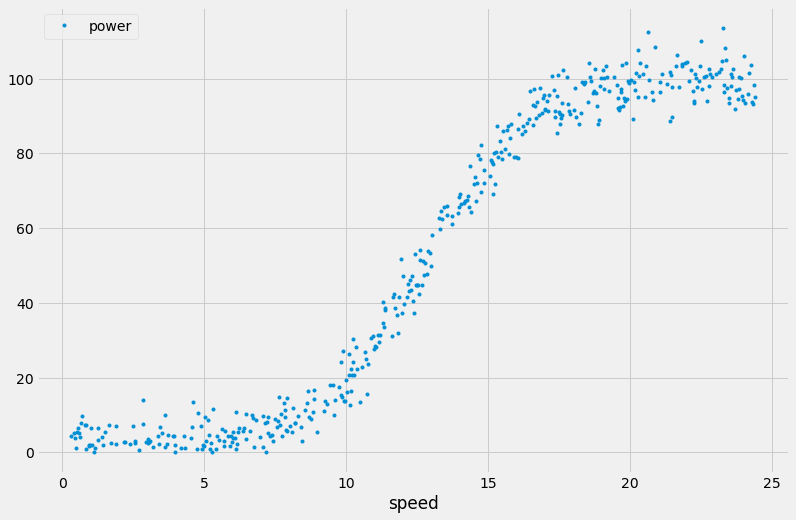

In [119]:
data.plot(x="speed", y="power", style=".")
plt.show()

In [ ]:
data.groupby('a').count()
